In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/well-logging-challenge/F02-1_logs.las


# Day 1 

# Kindly load the las file of F02-1_logs.las well from the data folder
# Answer the following questions:
# How many well logs in the file ?
# How many data points (observations) in the welllogs ?
# Is there any null values? how much (%)/ well-log ?
# Is there a relationship between DT and RHOB?
# You can use the following liberaries for your assignment:
# Numpy, Pandas, Matplotlib, seaborn, LASIO

# Import and load Libraries 

In [3]:
pip install lasio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import lasio
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [5]:
las = lasio.read('/kaggle/input/well-logging-challenge/F02-1_logs.las')

# Convert las file to dataframe by using pandas

In [6]:
df = las.df()

In [7]:
df = df.reset_index('DEPTH')

In [8]:
df.head()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
0,48.00,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
1,48.15,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
2,48.30,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
3,48.45,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
4,48.60,NaN,524.0190,NaN,3820472.25,-455.6956,NaN


#  How many well logs in the file ?


In [13]:
df.columns

Index(['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AI_REL', 'PHIE'], dtype='object')

# Number of well logs = 6 well logs

# How many data points (observations) in the welllogs ?


In [91]:
df.shape

(9680, 7)

# number of data points in welllogs = 9680

# Is there any null values? how much (%)/ well-log ?


In [92]:
df.isnull().sum().sum()

6215

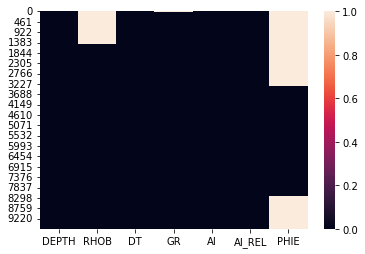

In [103]:
sns.heatmap(df.isnull())
plt.show()

# Number of null values = 6215 

#  (%)/ well-log

In [97]:
#put in number of null value in variable 
null_value = df.isnull().sum().sum()
# Get the number of rows in the well
num_rows = len(df)
#calculate % of null value / well
percentage = null_value *100 / num_rows
print(f'the percentage of null value / well log is:-{percentage} %')

the percentage of null value / well log is:-64.20454545454545 %


# Pecentage of null value / well log = 64.20454545454545

# Is there a relationship between DT(Sonic)and RHOB(Density)?


In [94]:
import seaborn as sns
corr = df["RHOB"].corr(df["DT"])
print(corr)

-0.7112990612444253


<AxesSubplot:>

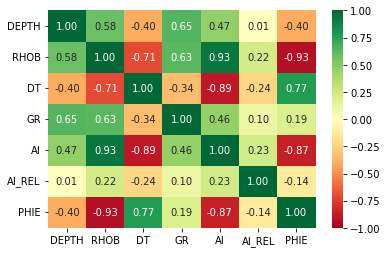

In [95]:
corr1 = df.corr()
sns.heatmap(corr1, annot=True, fmt='.2f', cmap='RdYlGn', vmin=-1, vmax=1)

# Day 2 : Data Loading and Manipulation
# You can use the following liberaries for your assignment:
# Numpy, Pandas, Matplotlib, seaborn, LASIO

# Kindly load the las file of F02-1_logs.las well from the data folder
# Perform the below Tasks:
# 1-Plot histogram for every well-log in the las file
# 2-Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.25,0.5,0.75])
# 3-Using np.log() transform the well logs into log of values
# 4-Plot histogram for every well-log after transforming them

# Import and load Libraries 

In [3]:
import lasio
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 

In [69]:
las = lasio.read('/kaggle/input/well-logging-challenge/F02-1_logs.las')

# Convert las file to dataframe by using pandas

In [70]:
df = las.df()

In [71]:
df = df.reset_index('DEPTH')

In [72]:
df

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
0,48.0000,NaN,524.0485,NaN,3820257.00,-455.6956,NaN
1,48.1500,NaN,524.0410,NaN,3820311.75,-455.6956,NaN
2,48.3000,NaN,524.0336,NaN,3820366.25,-455.6956,NaN
3,48.4500,NaN,524.0262,NaN,3820419.75,-455.6956,NaN
4,48.6000,NaN,524.0190,NaN,3820472.25,-455.6956,NaN
...,...,...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,3359011.00,-239115.9375,NaN
9676,1499.4000,1814.1691,534.8610,28.5281,3391772.00,-239115.9375,NaN
9677,1499.5500,1861.6497,537.1902,28.5813,3465524.00,-239115.9375,NaN
9678,1499.7001,1880.3978,537.2630,28.5813,3499957.75,-239115.9375,NaN


# EDA

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   9680 non-null   float64
 1   RHOB    8253 non-null   float64
 2   DT      9680 non-null   float64
 3   GR      9666 non-null   float64
 4   AI      9680 non-null   float64
 5   AI_REL  9680 non-null   float64
 6   PHIE    4906 non-null   float64
dtypes: float64(7)
memory usage: 529.5 KB


In [74]:
df.isnull().sum()

DEPTH        0
RHOB      1427
DT           0
GR          14
AI           0
AI_REL       0
PHIE      4774
dtype: int64

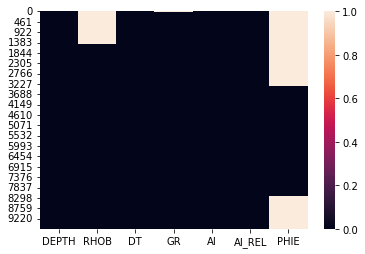

In [75]:
sns.heatmap(df.isnull())
plt.show()

# Trying to replace null value with mean 

# Q1 - Plot histogram for every well-log in the las file


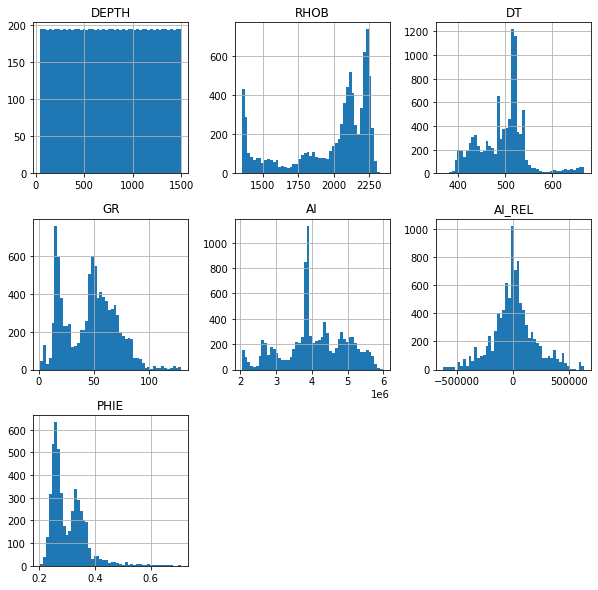

In [76]:
df.hist(bins=50,figsize=(10,10))
plt.show()

# Q3- Calculate the 5 points statistics for every well-log (min, Max and Percentiles[0.25,0.5,0.75])

In [82]:
df.describe()

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
count,9680.000000,8253.000000,9680.000000,9666.000000,9.680000e+03,9680.000000,4906.000000
mean,773.925016,1975.091074,495.026839,46.613531,4.078518e+06,5193.728898,0.304522
std,419.177962,294.677828,50.861145,23.484662,8.776878e+05,193455.679167,0.064282
min,48.000000,1350.444700,368.114700,1.339200,2.035267e+06,-617319.750000,0.203900
25%,410.962500,1812.400000,460.693600,23.527000,3.658766e+06,-95113.828100,0.257900
50%,773.925000,2096.345000,505.393400,48.765250,3.953107e+06,2603.301500,0.283000
75%,1136.887575,2210.906000,521.642300,63.162950,4.782770e+06,93553.453100,0.339800
max,1499.850100,2346.629200,667.920800,129.177300,5.983779e+06,629867.000000,0.709000


# Q3 -Using np.log() transform the well logs into log of values

In [91]:
# Apply the natural logarithm to each value in the DataFrame
df_log = np.log(df)

df_log

,DEPTH,RHOB,DT,GR,AI,AI_REL,PHIE
0,3.871201,NaN,6.261584,NaN,15.155828,NaN,NaN
1,3.874321,NaN,6.261570,NaN,15.155843,NaN,NaN
2,3.877432,NaN,6.261556,NaN,15.155857,NaN,NaN
3,3.880532,NaN,6.261542,NaN,15.155871,NaN,NaN
4,3.883624,NaN,6.261528,NaN,15.155885,NaN,NaN
...,...,...,...,...,...,...,...
9675,7.312720,7.488598,6.276968,3.318804,15.027157,NaN,NaN
9676,7.312820,7.503383,6.282007,3.350890,15.036863,NaN,NaN
9677,7.312920,7.529218,6.286352,3.352753,15.058374,NaN,NaN
9678,7.313020,7.539239,6.286488,3.352753,15.068261,NaN,NaN


# Q4-Plot histogram for every well-log after transforming them 

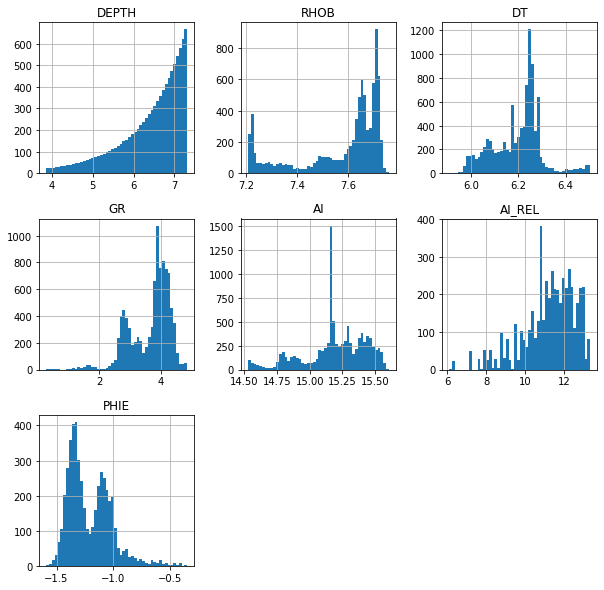

In [93]:
df_log.hist(bins=50,figsize=(10,10))
plt.show()